In [1]:
import numpy as np
from scipy import special as spc
from numpy import random as r
from matplotlib import pyplot as plt

In [2]:
c = 2.99792458e8
me = 9.1093856e-31

In [3]:
def f(u):
    return(u**2/(me**3*c**3*theta*spc.kn(2,1/theta))*np.e**(-np.sqrt(1+(u/(me*c))**2)/theta))
def sobol(n):
    u = np.zeros(n)
    for i in range(u.size):
        x4 = 1
        while np.e**((u[i]/(me*c)-np.sqrt(1+(u[i]/(me*c))**2))/theta)<=x4:
            x1 = r.rand()
            x2 = r.rand()
            x3 = r.rand()
            x4 = r.rand()
            u[i] = - theta * me * c * np.log(x1*x2*x3)
    return (u)

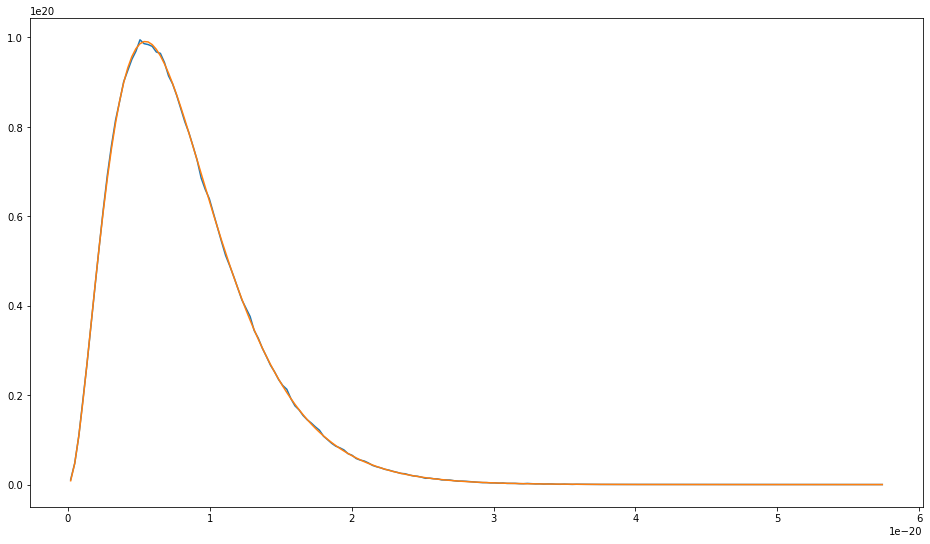

In [4]:
theta = 10
n = 10**6
us = sobol(n)
cmjd, u = np.histogram(us,bins=200,density=True)
u = (u[1:]+u[:-1])/2
amjd = f(u)
plt.plot(u,cmjd)
plt.plot(u,amjd)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(16,9)

In [56]:
def simpson(f,x):
    v = np.zeros(x.size)
    for i in range(v.size-1):
        v[i+1] += v[i]
        v[i+1] += (x[i+1]-x[i])/6*(f(x[i])+4*f((x[i]+x[i+1])/2)+f(x[i+1]))
    return(v)
def interpolation(xTable,yTable,x):
    if type(x) == np.ndarray:
        v = np.zeros(x.size)
        for j in range(x.size):
            for i in range(xTable.size):
                if(x[j] <= xTable[i]):
                    v[j] = (yTable[i]-yTable[i-1])/(xTable[i]-xTable[i-1])*(x[j]-xTable[i-1])+yTable[i-1]
                    break
        return(v)
    else:
        for i in range(xTable.size):
            if(x <= xTable[i]):
                return((yTable[i]-yTable[i-1])/(xTable[i]-xTable[i-1])*(x-xTable[i-1])+yTable[i-1])
def intCDF(n,f,x):
    v = np.zeros(n)
    for i in range(n):
        v[i] = interpolation(f,x,r.rand())
    return(v)

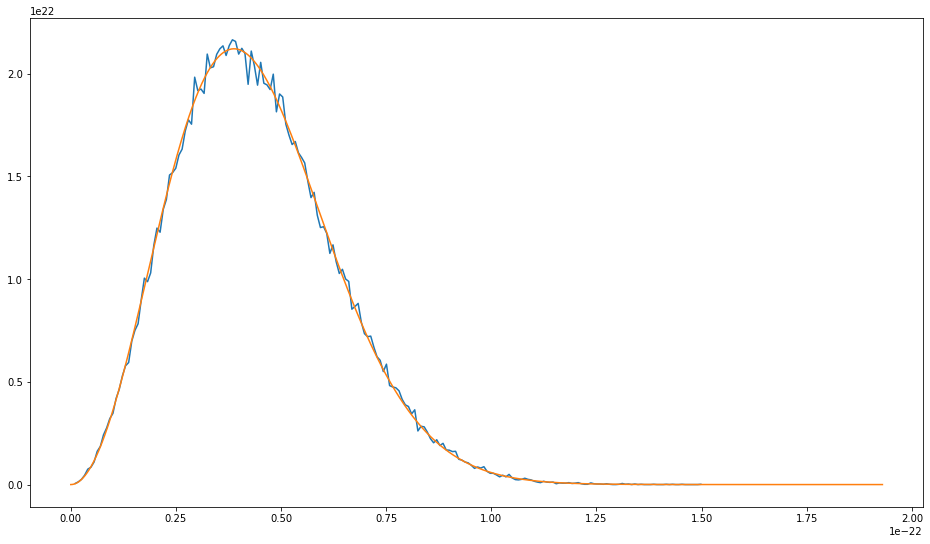

In [59]:
theta = 0.01
vMax = np.sqrt(2*theta*c**2)
uMax = 5*me*vMax
u = np.arange(0,uMax,uMax/2000)
s = simpson(f,u)
s = s/max(s)
n = 10**5
us = intCDF(n,s,u)
y, x = np.histogram(us,bins = 200,density = True)
x = (x[:-1]+x[1:])/2
v = f(u)
y = y*sum(v)*(u[1]-u[0])
plt.plot(x,y)
plt.plot(u,v)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(16,9)